# Сборный проект-1 

**Описание проекта** 
Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

**Цели и задачи:** Провести анализ данных из открытых источников о продажах игр, оценках пользователей и экспертов, жанров и платформ. Определить основные факторы коммерческого успеха игры.

**План работы**
1. Изучение общей информации о данных
2. Подготовка данных
    1. Обработка пропусков
    2. Поиск дубликатов
    3. Преобразование данных в таблице
    4. Расчет дополнительных параметров
3. Исследовательский анализ данных
    1. Выбор актуальных игровых платформ и периода релиза игр
    2. Исследование продаж по актуальным платформам
    3. Влияние отзывов пользователей и критиков на продажи
    4. Влияние жанра игры на продажи
4. Портрет пользователя каждого региона
5. Проверка гипотез
    1. Удаление выбросов в оценках пользователей
    2. Средние пользовательские рейтинги платформ Xbox One и PC
    3. Средние пользовательские рейтинги жанров Action и Sports.
6. Общий вывод

## Этап 1. Загрузка данных 

In [7]:
#импорт необходимых библиотек 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
from scipy import stats
import seaborn as sns

In [8]:
try:
    df_games = pd.read_csv('/datasets/games.csv')
except Exception:
    df_games = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')


In [9]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [10]:
df_games.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN



Название столбцов и их обозначение:

`Name` — название игры
`Platform` — платформа
`Year_of_Release` — год выпуска
`Genre` — жанр игры
`NA_sales` — продажи в Северной Америке (миллионы проданных копий)
`EU_sales` — продажи в Европе (миллионы проданных копий)
`JP_sales` — продажи в Японии (миллионы проданных копий)
`Other_sales` — продажи в других странах (миллионы проданных копий)
`Critic_Score` — оценка критиков (максимум 100)
`User_Score` — оценка пользователей (максимум 10)
`Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

### Вывод
В каждой строке содержится информация о выпущенной игре.Всего строк 16715, значит всего информация о 16715 выпущенных играх, если нет дубликатов.
В некоторых строках есть пропуски, также неккоректно выбраны типы данных. 

## Этап 2. Предготовка данных

#### Форматирование столбцов 

In [12]:
#приведем все названия столбцов к нижнему регистру
df_games.columns = df_games.columns.str.lower()
df_games.columns



Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

#### Обработка пропусков 

In [14]:
df_games.isna().sum().sort_values()/df_games.shape[0]*100

platform            0.000000
na_sales            0.000000
eu_sales            0.000000
jp_sales            0.000000
other_sales         0.000000
name                0.011965
genre               0.011965
year_of_release     1.609333
user_score         40.089740
rating             40.478612
critic_score       51.319174
dtype: float64

процент пропусков в столбцах `name`, `genre`, `year_of_release` меньше 10%. Удаление этих данных не повлияет на результаты. Можно удалить

In [18]:
delete_columns = ['name', 'genre', 'year_of_release']

for column in delete_columns:
    df_games.dropna(subset=[column], inplace=True)
    
df_games.isna().sum().sort_values()/df_games.shape[0]*100

name                0.000000
platform            0.000000
year_of_release     0.000000
genre               0.000000
na_sales            0.000000
eu_sales            0.000000
jp_sales            0.000000
other_sales         0.000000
user_score         40.166626
rating             40.598395
critic_score       51.453418
dtype: float64

**Посмотрим на данные столбца user_score**

In [21]:
df_games['user_score'].value_counts(dropna=False)

NaN    6605
tbd    2376
7.8     322
8       285
8.2     276
       ... 
1         2
1.3       2
2.3       2
0         1
9.7       1
Name: user_score, Length: 97, dtype: int64

В столбце присутсвует интересное значение tbt. Это означает, что данных очень мало для того, чтобы поставить оценку. Раз данных мало для оценки, то логично заменить это значение на nan. 

In [22]:
df_games['user_score'] = df_games['user_score'].replace('tbd', np.nan)

В данном столбце много пропущенных данных (около 55%). Посмотрим на строки с пропусками.


In [45]:
df_games[df_games['user_score'].isna()].head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN,30.26
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN,28.31
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN,24.67
12,Pokemon Gold/Pokemon Silver,GB,1999,Role-Playing,9.00,6.18,7.20,0.71,NaN,NaN,NaN,23.09
18,Super Mario World,SNES,1990,Platform,12.78,3.75,3.54,0.55,NaN,NaN,NaN,20.62
20,Pokemon Diamond/Pokemon Pearl,DS,2006,Role-Playing,6.38,4.46,6.04,1.36,NaN,NaN,NaN,18.24
21,Super Mario Land,GB,1989,Platform,10.83,2.71,4.18,0.42,NaN,NaN,NaN,18.14
22,Super Mario Bros. 3,NES,1988,Platform,9.54,3.44,3.84,0.46,NaN,NaN,NaN,17.28


При первом осмотрении никакой зависимости не обнаружено. Пропуски замечены в играх разныз годов выпуска и разных игровых платформ. Пропусков очень много. Заменить на 0 будет очень плохой идеей, а использовать медианное значение исказит картину. Также видно, что пропуски также присутвуют в столбцах critic_score и rating. Возможно, это техническая ошибка, которая произошла при формировании данных

**посмотрим на столбец rating** 

In [29]:
df_games['rating'].value_counts(dropna=False)

NaN     6676
E       3921
T       2905
M       1536
E10+    1393
EC         8
K-A        3
RP         1
AO         1
Name: rating, dtype: int64

Значения рейтингов следующие 

E - контент для всех
M - от 17 лет и выше
T -от 13 лет и выше
E10+ - от 10 лет и выше
K-A - старое обозначение рейтинга "E"
AO - от 18 лет и выше
EC - заменён рейтингом "E" ввиду малого использования
RP - рейтинг пока не определён

По аналогии с предыдущим столбцом заменим RP на Nan


In [30]:
df_games['rating'] = df_games['rating'].replace('RP', np.nan)

In [31]:
df_games[df_games['rating'].isna()].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN


Аналогично предыдущему столбцу как-либо изменяя пропуски есть большой риск слишком сильно исказить данные. Лучше оставить как есть. Возможно, какие-то данные уйдут сами по себе при обработке выбросов

**Посмотрим на столбец critic_score** 

In [34]:
df_games['critic_score'].value_counts(dropna=False)

NaN     8461
70.0     252
71.0     248
75.0     240
80.0     235
        ... 
20.0       3
29.0       3
21.0       1
17.0       1
13.0       1
Name: critic_score, Length: 82, dtype: int64

In [35]:
df_games[df_games['critic_score'].isna()].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN


Аналогично предыдущим столбцам оставим данные как есть

#### Проверка дубликатов

In [46]:
df_games.duplicated().sum()

0

#### Преобразование типа данных

In [36]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   object 
 10  rating           9767 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


Заменим тип данных в стобце `user_score` на числовой. В столбце `year_of_release` на целочисленный. В столбцах `critic_score`, `user_score` логичнее было бы видеть рейтинг челочисленный. Но так как в столбцах присутсвуют Nan, которые не могут храниться как целочисленные, оставим эти столбцы без изменений. 

In [37]:
df_games['user_score'] = pd.to_numeric(df_games['user_score'])

In [41]:
df_games['year_of_release'] = df_games['year_of_release'].astype(np.int64)

### Дополнительные расчеты

In [42]:
#создадим столбец с общими продажами 
df_games['sales'] = df_games['na_sales'] + df_games['eu_sales'] + df_games['jp_sales'] + df_games['other_sales']
df_games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


 ### Дополнительная замена данных

Еще раз взглянем на рейтинг ESRB
По информации на сайте ESRB (https://www.esrb.org/ratings-guide/):

E - everyone (контент для всех)
M - mature (от 17 лет и выше)
T - teen (от 13 лет и выше)
E10+ - everyone 10+ (от 10 лет и выше)
K-A - kids to adults (старое обозначение рейтинга "E")
AO - adults only (от 18 лет и выше)
EC - early childhood (заменён рейтингом "E" ввиду малого использования)
RP - rating pending (рейтинг пока не определён)
Заменим значения EC, K-A на E

In [43]:
df_games.loc[(df_games['rating'] == 'EC') | (df_games['rating'] == 'K-A'), 'rating'] = 'E'

In [44]:
df_games['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'AO'], dtype=object)

### Вывод
Пропуски заполнены, данные изменены, 

## Исследовательский анализ данных 

Необходимые исследования:

1. Сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
2. Как менялись продажи по платформам. Выбрать платформы с наибольшими суммарными продажами и построить распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
3. Выбрать актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Данные помогут построить прогноз на 2017 год.
4. Не учитывайте в работе данные за предыдущие годы.
5.  Какие платформы лидируют по продажам, растут или падают? Выберать несколько потенциально прибыльных платформ.
6. Постройть график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Описать результат.
7. Как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройть диаграмму рассеяния и посчитать корреляцию между отзывами и продажами. Сформулировать выводы.
8.  Соотнести выводы с продажами игр на других платформах.
9. Общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

### Выпуск игр 

In [47]:
df_games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


In [48]:
df_games['year_of_release'].describe()

count    16444.000000
mean      2006.486256
std          5.875525
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2016.000000
Name: year_of_release, dtype: float64

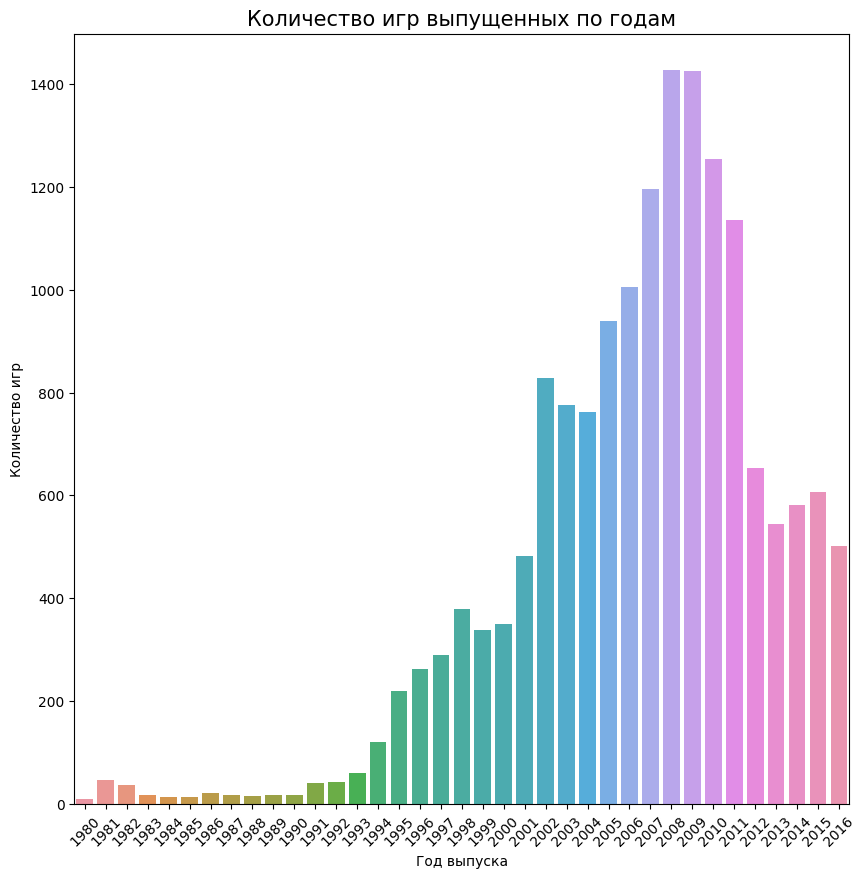

In [57]:
count_game = (df_games.pivot_table(index='year_of_release', values='name', aggfunc='count')
              .sort_values('year_of_release'))
count_game_df = count_game.reset_index()
plt.figure(figsize=(10, 10))
plt.xticks(rotation=45)
sns.barplot(x='year_of_release', y='name', data=count_game_df)
plt.title('Количество игр выпущенных по годам', fontsize=15)
plt.xlabel('Год выпуска')
plt.ylabel('Количество игр')
plt.show()


На графике видно, что количество выпущенных игр неуклонно росло 2008-2009 годов. Тем не менее до 1991 годов игр выпускалось очень мало, эти данные можно не рассматривать, так как тогда игры не пользовались большой популярностью и не были достпуны большому количеству людей. Эти данные в расчет брать не будем 

In [58]:
df_games  = df_games[df_games['year_of_release'] >= 1991]

### Продажи по платформам 

In [71]:
df_platforms = df_games.pivot_table(index='platform', values='sales', aggfunc='sum').reset_index()
df_platforms = df_platforms.sort_values('sales', ascending=False).head()
df_platforms

,platform,sales
15,PS2,1233.56
27,X360,961.24
16,PS3,931.34
25,Wii,891.18
3,DS,802.76


Возьмем для анализа 5 топовых платформ на период от 1991 до 2016 года и проанализируем "жизнь" консолей.

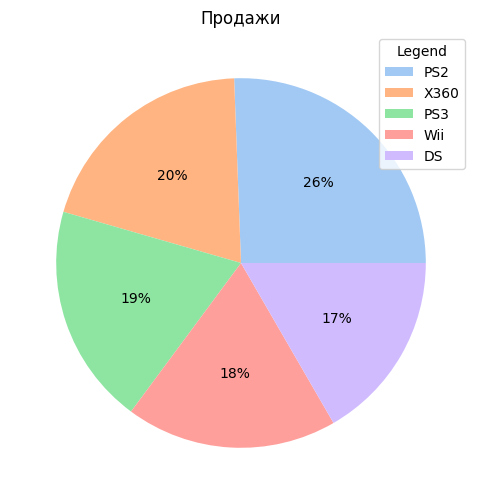

In [62]:
df_platform_top = df_platforms.sort_values('sales', ascending=False).head(5)
plt.figure(figsize=(10, 6))
colors = sns.color_palette('pastel')[ 0:5 ]
plt.pie(df_platform_top['sales'], colors = colors, autopct='%.0f%%')
plt.legend(labels=df_platform_top['platform'], title='Legend')
plt.title('Продажи')
plt.show()

Видно, что самый большой процент продаж у PS2 - 26%, а самый маленький у DS - 17%. 

Построим график распределения 

In [72]:
top_platforms = list(df_platforms['platform'].head().unique())
top_platforms

['PS2', 'X360', 'PS3', 'Wii', 'DS']

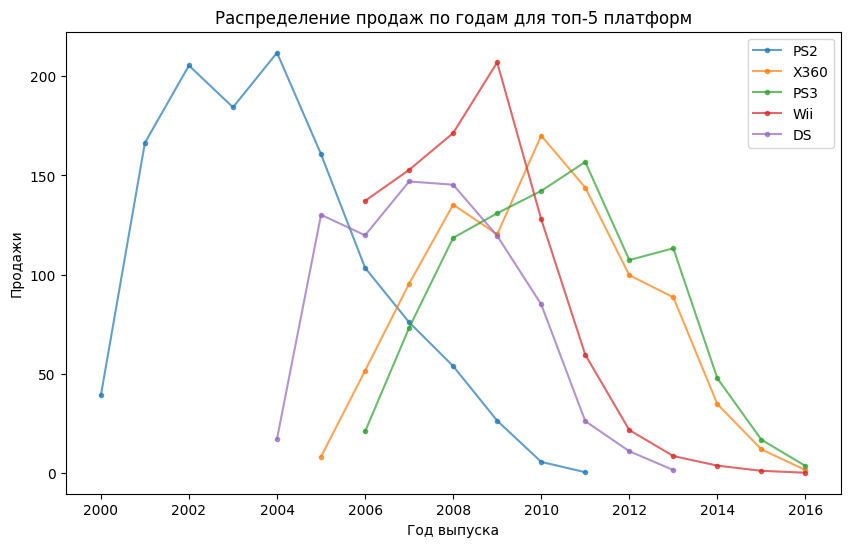

In [81]:
top_platforms_data = df_games[df_games['platform'].isin(top_platforms)]
yearly_sales = top_platforms_data.groupby(['year_of_release', 'platform'])['sales'].sum().reset_index()

plt.figure(figsize=(10, 6))
for platform in top_platforms:
    platform_sales = yearly_sales[yearly_sales['platform'] == platform]
    plt.plot(platform_sales['year_of_release'], platform_sales['sales'], label=platform, alpha=0.7, marker='.')

plt.xlabel('Год выпуска')
plt.ylabel('Продажи')
plt.title('Распределение продаж по годам для топ-5 платформ')
plt.legend()
plt.show()

Посмотрим на данные ближе 

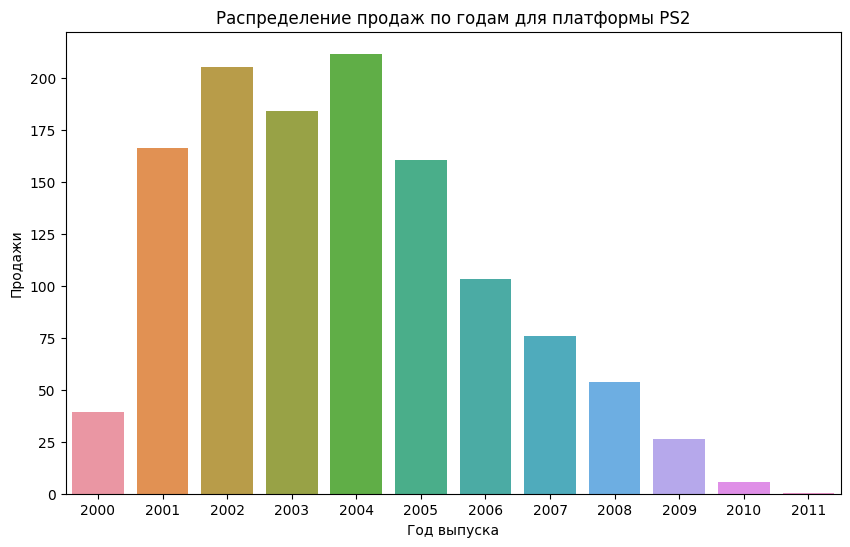

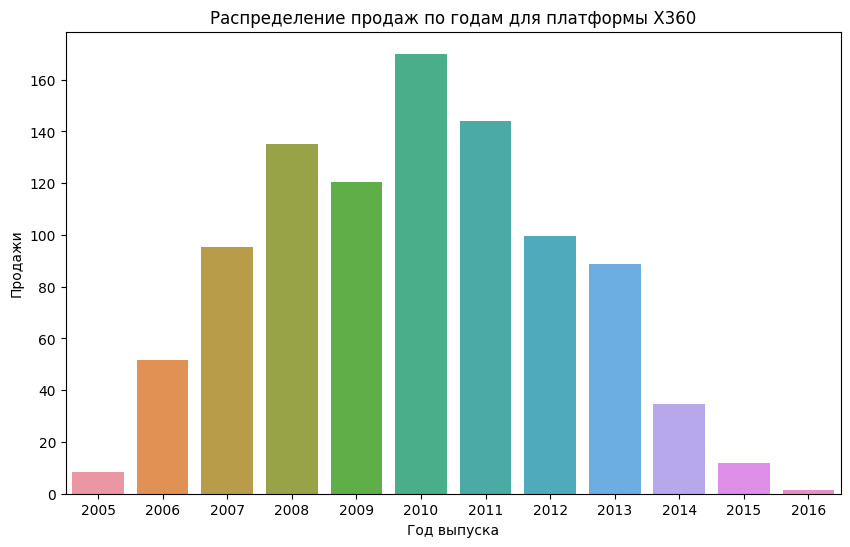

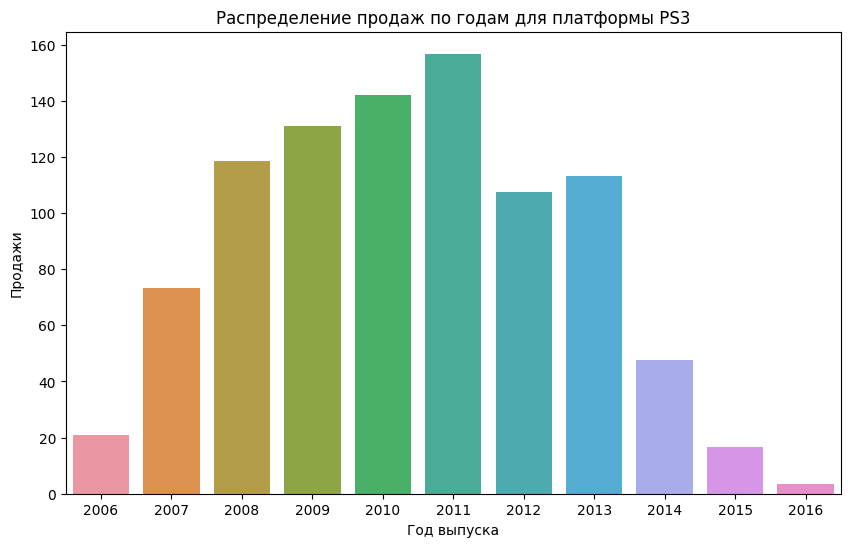

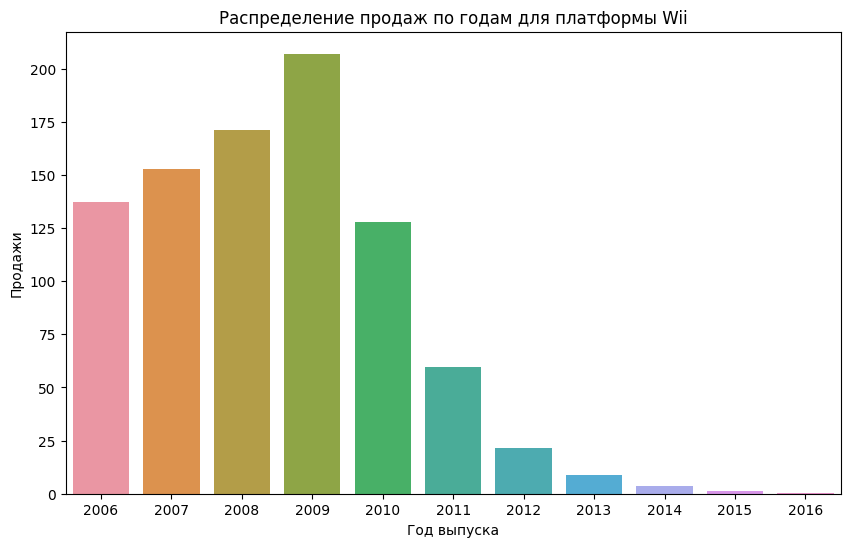

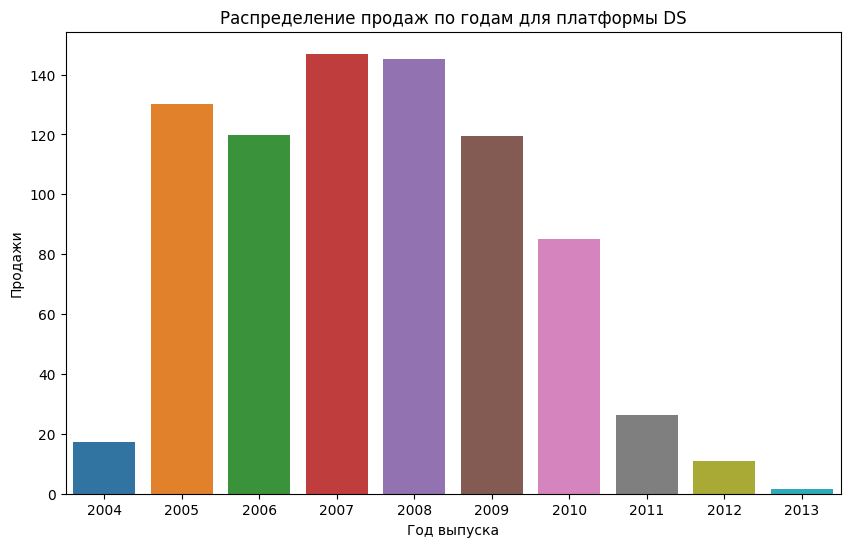

In [91]:
for platform in top_platforms:
    platform_sales = yearly_sales[yearly_sales['platform'] == platform]
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x='year_of_release', y='sales', data=platform_sales)
    plt.xlabel('Год выпуска')
    plt.ylabel('Продажи')
    plt.title('Распределение продаж по годам для платформы {}'.format(platform))
    plt.show()

Примерный срок жизни каждых платформ 10 лет. К окончанию "срока жизни" наблюдается сильный спад продаж. Также заметна тенденция,что на середину срока жизни приходится наибольшее количество продаж


### Выбор акутального периода

In [95]:
df_games_realese = df_games.pivot_table(index='platform', values='year_of_release', aggfunc='first').sort_values('year_of_release')
df_games_realese


,year_of_release
platform,
GEN,1992
GG,1992
SNES,1993
SCD,1993
NES,1993
NG,1994
3DO,1995
TG16,1995
SAT,1995


In [103]:
df_games_filtred_by_yaer = df_games_realese.sort_values(by='year_of_release', ascending=False).reset_index().head()
df_games_filtred_by_yaer_name = list(df_games_filtred_by_yaer['platform'].unique())
df_games_filtred_by_yaer_name

['XOne', 'PS4', 'WiiU', 'PSV', 'PS3']

Для дальнейшего исследования выберем период с 2012 до 2016
Игровые платформы для исследования: 'XOne', 'PS4', 'WiiU', 'PSV', 'PS3'


In [109]:
top_platforms_data = df_games[df_games['platform'].isin(df_games_filtred_by_yaer_name)]
#yearly_sales = top_platforms_data.groupby(['year_of_release', 'platform'])['sales'].sum().reset_index()

for platform in top_platforms_data:
    platform_sales = yearly_sales[yearly_sales['platform'] == platform]
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x='year_of_release', y='sales', data=platform_sales)
    plt.xlabel('Год выпуска')
    plt.ylabel('Продажи')
    plt.title('Распределение продаж по годам для платформы {}'.format(platform))
    plt.show()

ValueError: min() arg is an empty sequence

<Figure size 1000x600 with 0 Axes>

In [107]:
top_platforms_data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79
37,Call of Duty: Modern Warfare 3,PS3,2011,Shooter,5.54,5.73,0.49,1.57,88.0,3.2,M,13.33
41,Call of Duty: Black Ops,PS3,2010,Shooter,5.99,4.37,0.48,1.79,88.0,6.4,M,12.63
